# Emotion Analysis

### Import Dependencies

In [1]:
import pandas as pd
import nltk
import string

from collections import Counter

import matplotlib.pyplot as plt

### Reading CSV File

In [2]:
first_df = pd.read_csv("Concat_ML_Data/first_debate.csv")
second_df = pd.read_csv("Concat_ML_Data/second_debate.csv")
third_df = pd.read_csv("Concat_ML_Data/third_debate.csv")

In [3]:
test_df=pd.concat([first_df, second_df, third_df])
test_df.head()

,tweet,replies_count,retweets_count,likes_count,candidate,tweet_length,Subjectivity,Polarity,Sentiment
0,Should we have CRT in schools We need leader,1,0,2,Biden,9,0.000000,0.000000,Neutral
1,Literally trump but ok,0,0,0,Biden,4,0.500000,0.500000,Positive
2,Pres you missed the op to mention HBCU obvious...,0,0,0,Biden,25,0.333333,-0.111111,Negative
3,THIS IS ANTIFA,0,0,0,Biden,3,0.000000,0.000000,Neutral
4,Yeah silence is oppression especially from th...,2,0,0,Biden,45,1.000000,0.000000,Neutral


In [4]:
# Separating entire dataset to for Trump and Biden
biden_sentiment=test_df[(test_df['candidate']=='Biden')]
trump_sentiment=test_df[(test_df['candidate']=='Trump')]

In [6]:
# Keeping the tweet columns for both datasets
biden_sentiment=pd.DataFrame(biden_sentiment, columns=['tweet'])
trump_sentiment=pd.DataFrame(trump_sentiment, columns=['tweet'])

### Pre-processing for Emotion Analysis

In [31]:
# Converting all text to lowercase
trump_sentiment['tweet']=trump_sentiment['tweet'].str.lower()

In [32]:
# Creating Function to tokenize words in tweet columns
def tokenized_words(row):
    tweet = row['tweet']
    tokens = nltk.word_tokenize(tweet)
    token_wds = [word for word in tokens if word.isalpha()]
    return token_wds

In [33]:
# Applying tokeninzed_words function to dataset
trump_sentiment['t_words']=trump_sentiment.apply(tokenized_words, axis=1)
trump_sentiment.head()

,tweet,t_words
490063,donald keep up your infantile name calling it...,"[donald, keep, up, your, infantile, name, call..."
490064,the sad thing is he probably proud of them wa...,"[the, sad, thing, is, he, probably, proud, of,..."
490065,m just going off this really don give much of...,"[m, just, going, off, this, really, don, give,..."
490066,holy cow 25 people at bidens campaign stop yo...,"[holy, cow, people, at, bidens, campaign, stop..."
490067,maybe come to the next debate and show some r...,"[maybe, come, to, the, next, debate, and, show..."


### Import Stopwords from NLTK

In [34]:
from nltk.corpus import stopwords
stops = set(stopwords.words("english"))

In [35]:
# Creating Function to remove stop words in tweet column
def remove_stop_wds(row):
    t_words=row['t_words']
    meaningful_words = [word for word in t_words if not word in stops]
    return (meaningful_words)

In [36]:
# Applying remove_stop_wds function to dataset
trump_sentiment['final_wds']=trump_sentiment.apply(remove_stop_wds, axis=1)
trump_sentiment.head()

,tweet,t_words,final_wds
490063,donald keep up your infantile name calling it...,"[donald, keep, up, your, infantile, name, call...","[donald, keep, infantile, name, calling, worki..."
490064,the sad thing is he probably proud of them wa...,"[the, sad, thing, is, he, probably, proud, of,...","[sad, thing, probably, proud, wait, sorry, thi..."
490065,m just going off this really don give much of...,"[m, just, going, off, this, really, don, give,...","[going, really, give, much, shit, probably, qu..."
490066,holy cow 25 people at bidens campaign stop yo...,"[holy, cow, people, at, bidens, campaign, stop...","[holy, cow, people, bidens, campaign, stop, je..."
490067,maybe come to the next debate and show some r...,"[maybe, come, to, the, next, debate, and, show...","[maybe, come, next, debate, show, respect, sou..."


In [37]:
# Creating list of all meaningful words in the final_wds column
meaningful_list =[]
def meaningful_words(row):
    final_words=row['final_wds']
    for word in final_words:
        meaningful_list.append(word)
    return ('Complete')

In [38]:
# Applying meaningful_words function to get list of final words
trump_sentiment.apply(meaningful_words, axis=1)

490063    Complete
490064    Complete
490065    Complete
490066    Complete
490067    Complete
            ...   
851654    Complete
851655    Complete
851656    Complete
851657    Complete
851658    Complete
Length: 2035571, dtype: object

### Performing Emotion Analysis

In [39]:
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in meaningful_list:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)

Counter({' sad': 58, ' happy': 58, ' fearful': 40, ' angry': 31, ' attracted': 30, ' powerless': 21, ' singled out': 15, ' hated': 14, ' anxious': 14, ' attached': 13, ' fearless': 13, ' cheated': 12, ' entitled': 12, ' belittled': 10, ' esteemed': 9, ' adequate': 9, ' loved': 8, ' apathetic': 8, ' alone': 8, ' lustful': 7, ' surprise': 6, ' bored': 5, ' independent': 5, ' codependent': 5, ' demoralized': 5, ' free': 5, ' derailed': 4, ' embarrassed': 3, ' average': 3, ' obsessed': 3, ' focused': 3, ' ecstatic': 3, ' lost': 3, ' safe': 2, ' burdened': 2})


In [41]:
# Creating lists from keys and values for w
x=list(w.keys())
y=list(w.values())

In [42]:
# Creating pandas dataframe from x and y lists
emotion_df = pd.DataFrame({
          "Emotion" : x,
          "Value": y})

emotion_df

,Emotion,Value
0,cheated,12
1,singled out,15
2,loved,8
3,attracted,30
4,sad,58
5,fearful,40
6,happy,58
7,angry,31
8,bored,5
9,esteemed,9


### Plotting Barplot for Emotions

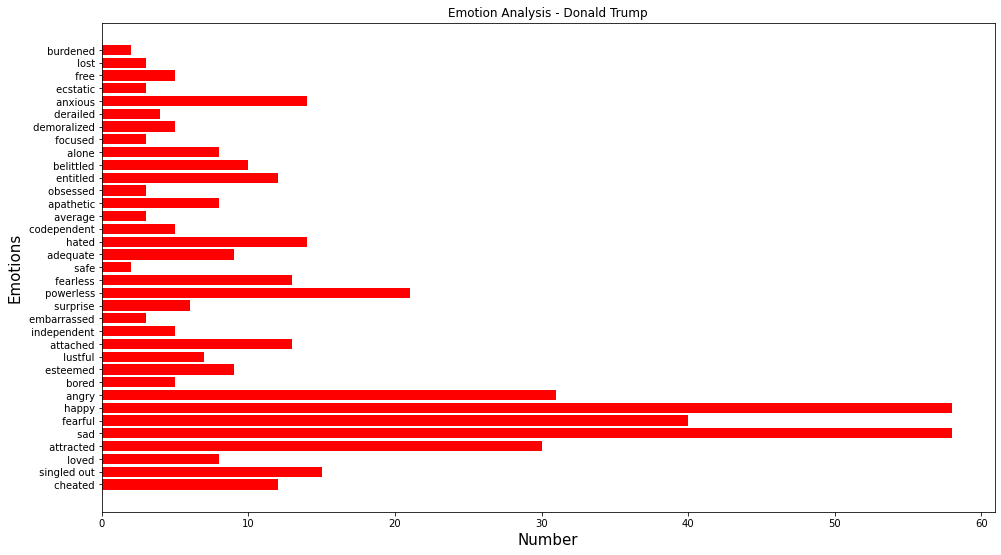

In [43]:
fig, ax1 = plt.subplots(figsize=(16,9))
ax1.barh(emotion_df.Emotion, emotion_df.Value, color=['red'])
ax1.set_xlabel('Number', size=15)
ax1.set_ylabel('Emotions', size=15)
ax1.set_title('Emotion Analysis - Donald Trump')
# fig.autofmt_xdate()
plt.savefig('Images/Trump_2020_emotions.png')
plt.show()

In [44]:
# Arranging the emotions by descending values
top_emotions_trump = emotion_df.sort_values(["Value"], ascending=False)
top_emotions_trump

,Emotion,Value
4,sad,58
6,happy,58
5,fearful,40
7,angry,31
3,attracted,30
15,powerless,21
1,singled out,15
30,anxious,14
19,hated,14
16,fearless,13


In [45]:
# Creating table with top 10 Emotions
top10_emotions_trump = top_emotions_trump.head(10)
top10_emotions_trump

,Emotion,Value
4,sad,58
6,happy,58
5,fearful,40
7,angry,31
3,attracted,30
15,powerless,21
1,singled out,15
30,anxious,14
19,hated,14
16,fearless,13


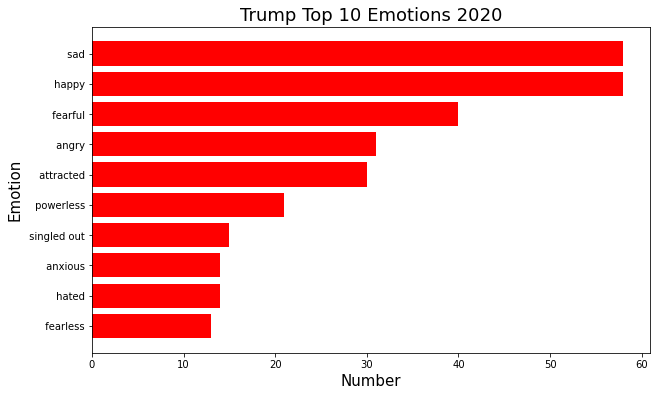

In [46]:
plt.figure(figsize=(10,6))

plt.barh('Emotion', 'Value',data=top10_emotions_trump, color=['red'])
plt.xlabel("Number", size=15)
plt.ylabel("Emotion", size=15)
plt.title("Trump Top 10 Emotions 2020", size=18)
plt.gca().invert_yaxis()

plt.savefig("Images/Trump_2020_top10_emotions.png")
plt.show()

In [47]:
# Bottom 10 Emotions
bottom10_emotions_trump = top_emotions_trump.tail(10)
bottom10_emotions_trump

,Emotion,Value
8,bored,5
29,derailed,4
31,ecstatic,3
13,embarrassed,3
27,focused,3
21,average,3
33,lost,3
23,obsessed,3
17,safe,2
34,burdened,2


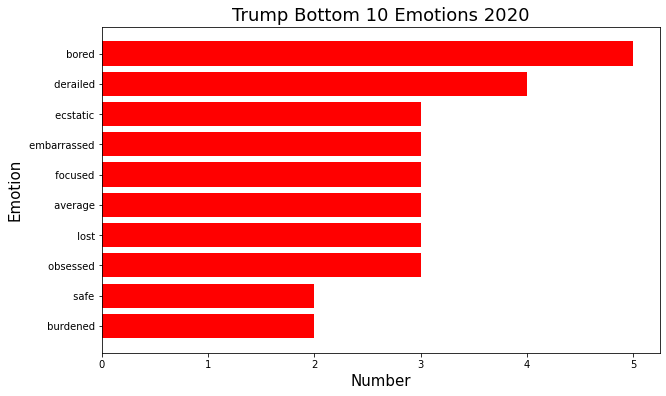

In [48]:
plt.figure(figsize=(10,6))

plt.barh('Emotion', 'Value',data=bottom10_emotions_trump, color=['red'])
plt.xlabel("Number", size=15)
plt.ylabel("Emotion", size=15)
plt.title("Trump Bottom 10 Emotions 2020", size=18)
plt.gca().invert_yaxis()
plt.savefig("Images/Trump_2020_bottom10_emotions.png")
plt.show()